# Capstone - Poisson Model with Football Data 2009-2019

We will first begin to run a poisson distribution on the football data from 2009-2019.

The goal of the model is to achieve an accuracy of approximately 50% in predicting match results.  Although this model has been historically used in the past for sports betting, it is relatively simple by nature and effective.  It does not take into account any potential features that might lead to a more accurate model such as team morale, manager changes, player roster changes, weather, pitch conditions, injuries, time of day, etc.

The dataset only has 3800 matches stemming from the last 10 seasons.  It may seem like a smaller set and your intuition might tell you that it is not enough data to train the model.  However, the Premier League only plays 380 matches a year and each season has 3 teams relegated to the second tier while 3 teams get promoted to the second tier.  Therefore, seasons differ tremendously from year to year.  Too much data and our results will be skewed while too little will lead to overfitting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson, skellam

In [2]:
# We will read in the CSV and remove the unnecessary rows.
pl_df = pd.read_csv('pl_data.csv')

In [3]:
pl_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,WHH,WHD,WHA,SJH,Date_y,HomeTeam_y,AwayTeam_y,Season,GoalDifference,RefBiasScore
0,0,E0,2009-08-15,Aston Villa,Wigan,0.0,2.0,A,0.0,1.0,...,1.70,3.40,5.50,1.67,2009-08-15,Aston Villa,Wigan Athletic,2009-10,-2.0,0.194539
1,1,E0,2009-08-15,Blackburn,Manchester City,0.0,2.0,A,0.0,1.0,...,3.50,3.20,2.15,3.30,2009-08-15,Blackburn Rovers,Manchester City,2009-10,-2.0,0.258294
2,2,E0,2009-08-15,Bolton,Sunderland,0.0,1.0,A,0.0,1.0,...,2.30,3.20,3.20,2.30,2009-08-15,Bolton Wanderers,Sunderland AFC,2009-10,-1.0,0.436620
3,3,E0,2009-08-15,Chelsea,Hull City,2.0,1.0,H,1.0,1.0,...,1.17,6.50,21.00,1.18,2009-08-15,Chelsea FC,Hull City,2009-10,1.0,0.425121
4,4,E0,2009-08-15,Everton,Arsenal,1.0,6.0,A,0.0,3.0,...,3.20,3.20,2.30,3.25,2009-08-15,Everton FC,Arsenal FC,2009-10,-5.0,0.464912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,3795,E0,2019-12-05,Liverpool,Wolverhampton,2.0,0.0,H,1.0,0.0,...,1.29,5.50,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3796,3796,E0,2019-12-05,Manchester United,Cardiff City,0.0,2.0,A,0.0,1.0,...,1.25,6.50,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3797,3797,E0,2019-12-05,Southampton,Huddersfield Town,1.0,1.0,D,1.0,0.0,...,1.40,4.75,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3798,3798,E0,2019-12-05,Tottenham Hotspur,Everton,2.0,2.0,D,1.0,0.0,...,2.10,3.50,3.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pl_df.shape

(3800, 43)

In [5]:
pl_df.isna().sum()

Unnamed: 0           0
Div                  0
Date                 0
HomeTeam             0
AwayTeam             0
FTHG                 0
FTAG                 0
FTR                  0
HTHG                 0
HTAG                 0
HTR                  0
Referee              0
HS                   0
AS                   0
HST                  0
AST                  0
HF                   0
AF                   0
HC                   0
AC                   0
HY                   0
AY                   0
HR                   0
AR                   0
B365H                0
B365D                0
B365A                0
LBH                381
LBD                381
LBA                381
SBH               2660
SBD               2660
SBA               2660
WHH                  0
WHD                  0
WHA                  0
SJH               1860
Date_y             380
HomeTeam_y         380
AwayTeam_y         380
Season             380
GoalDifference     380
RefBiasScore       380
dtype: int6

In [6]:
pl_df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'LBH', 'LBD', 'LBA', 'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH',
       'Date_y', 'HomeTeam_y', 'AwayTeam_y', 'Season', 'GoalDifference',
       'RefBiasScore'],
      dtype='object')

In [7]:
# Drop unnecessary columns
pl_df = pl_df.drop(columns = ['HTHG', 'HTAG', 'Referee', 'LBH', 'LBD', 'LBA', 'SBH', 'LBD', 'LBA', 'SBH', 'SBD',\
                              'SBA', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'Date_y', 'HomeTeam_y', 'AwayTeam_y',
                              'RefBiasScore', 'Unnamed: 0', 'Div'])

In [8]:
# Sort the dataframe for legibility purposes
pl_df = pl_df[['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'GoalDifference','HS', 'AS',\
               'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'FTR']]

In [9]:
# Check datatypes
pl_df.dtypes

Date               object
Season             object
HomeTeam           object
AwayTeam           object
FTHG              float64
FTAG              float64
GoalDifference    float64
HS                float64
AS                float64
HST               float64
AST               float64
HF                float64
AF                float64
HC                float64
AC                float64
HY                float64
AY                float64
HR                float64
AR                float64
B365H             float64
B365D             float64
B365A             float64
FTR                object
dtype: object

In [10]:
# Check NaN
pl_df.isna().sum()

Date                0
Season            380
HomeTeam            0
AwayTeam            0
FTHG                0
FTAG                0
GoalDifference    380
HS                  0
AS                  0
HST                 0
AST                 0
HF                  0
AF                  0
HC                  0
AC                  0
HY                  0
AY                  0
HR                  0
AR                  0
B365H               0
B365D               0
B365A               0
FTR                 0
dtype: int64

In [11]:
# I know that the season that was missing is 2018-2019 so we can fill the NaNs
pl_df['Season'].fillna('2018-2019', inplace = True)

In [12]:
# We can add the goal difference for the NaNs in Goal Difference by subtracting FTHG by FTAG
pl_df['GoalDifference'].fillna(pl_df['FTHG'] - pl_df['FTAG'], inplace = True)

In [13]:
pl_df.isna().sum()

Date              0
Season            0
HomeTeam          0
AwayTeam          0
FTHG              0
FTAG              0
GoalDifference    0
HS                0
AS                0
HST               0
AST               0
HF                0
AF                0
HC                0
AC                0
HY                0
AY                0
HR                0
AR                0
B365H             0
B365D             0
B365A             0
FTR               0
dtype: int64

### LEGEND

Now that we have our final data table, a legend is provided to help the user understand what each feature represents

- **Date**: Match Date
- **Season**: Premier League Season
- **HomeTeam**: Name of the Home Team
- **AwayTeam**: Name of the Away Team
- **FTHG**: Number of goals scored by the Home Team at Full Time
- **FTAG**: Number of goals scored by the Away Team at Full Time
- **GoalDifference**: Calculated as FTHG - FTAG
- **HS**: Home Team Shots
- **AS**: Away Team Shots
- **HST**: Home Team Shots on Target
- **AST**: Away Team Shots on Target
- **HF**: Home Team Fouls
- **AF**: Away Team Fouls
- **HC**: Home Team Corners
- **AC**: Away Team Corners
- **HY**: Home Team Yellow Cards
- **AY**: Away Team Yellow Cards
- **HR**: Home Team Red Cards
- **AR**: Away Team Red Cards
- **B365H, B365D, B365A**: Bet365 Odds for Home Win, Draw, Away Win respectively
- **FTR**: Full Time Result (represented by the Home Team)

Split the data into a train and test set so that we can evaluate the accuracy of the model.  Rather than use the train-test-split, we will separate the last half of the final season in our dataset.  If we randomly split the data on a set that has each team playing twice a season, it's possible that some teams will have less data to train on and will thus skew the results.

In [14]:
# Train set - we know that each season has 380 games.
pl_train = pl_df[:-190]

pl_train.shape

(3610, 23)

In [15]:
# Test set
pl_test = pl_df[-190:]

pl_test.shape

(190, 23)

# EDA

Now that we have our dataset tailor-made for the Poisson Distribution, we can begin to code our model.  As previously discussed, the poisson distribution states that we can calculate the probability of goals scored within a specific time period against the average rate of occurrence in which the goals are scored.  We assume that the goals scored are independent of time, that is to say that the outcomes of goals scored do not depend on goals that have already been scored in a match. The mathematical function is as follows:

$$ \begin{align}
P(k) &=  \frac{e^{-λ}λ^k}{k!},  k >0 \\
\end{align}$$

Where P(k) is the probability of the event occurring (in this case goals scored), λ is the average goals scored, and k is the number of occurence (e.g. k = 1, means 1 goal scored).

In [77]:
# We first need to find the means for the goals scored for the home and away team

pl_df.mean()

FTHG               1.570526
FTAG               1.180000
GoalDifference     0.390526
HS                14.181316
AS                11.229211
HST                6.014211
AST                4.763947
HF                10.618684
AF                11.133421
HC                 6.028158
AC                 4.774211
HY                 1.478421
AY                 1.771316
HR                 0.059474
AR                 0.087105
B365H              2.833200
B365D              4.110876
B365A              5.072226
dtype: float64

We see that on average, the home team scores a higher proportion of goals per game than the away team.  Home advantage clearly plays a role in performance output across many if not all the features.

Average Home Team Goals scored: **1.57** Goals per Match

Average Away Team Goals scored: **1.17** Goals per Match

These averages will be represented as λ in our poisson distribution.

We can check the number of goals scored per Match over the entire dataframe to get a skellam distribution which plots the two independent poisson distributions (home and away).

In [74]:
# First we need to take the proportion matches for each final home team score per match
fthg_pro = (pl_df['FTHG'].value_counts())/len(pl_df)

fthg_pro

1.0    0.316343
2.0    0.247922
0.0    0.225208
3.0    0.129917
4.0    0.051801
5.0    0.018560
6.0    0.006648
7.0    0.002216
8.0    0.001108
9.0    0.000277
Name: FTHG, dtype: float64

In [75]:
# Second we will do the same for the away team
ftag_pro = (pl_df['FTAG'].value_counts())/len(pl_df)

ftag_pro

0.0    0.336842
1.0    0.332687
2.0    0.200277
3.0    0.090028
4.0    0.028255
5.0    0.008310
6.0    0.003324
7.0    0.000277
Name: FTAG, dtype: float64

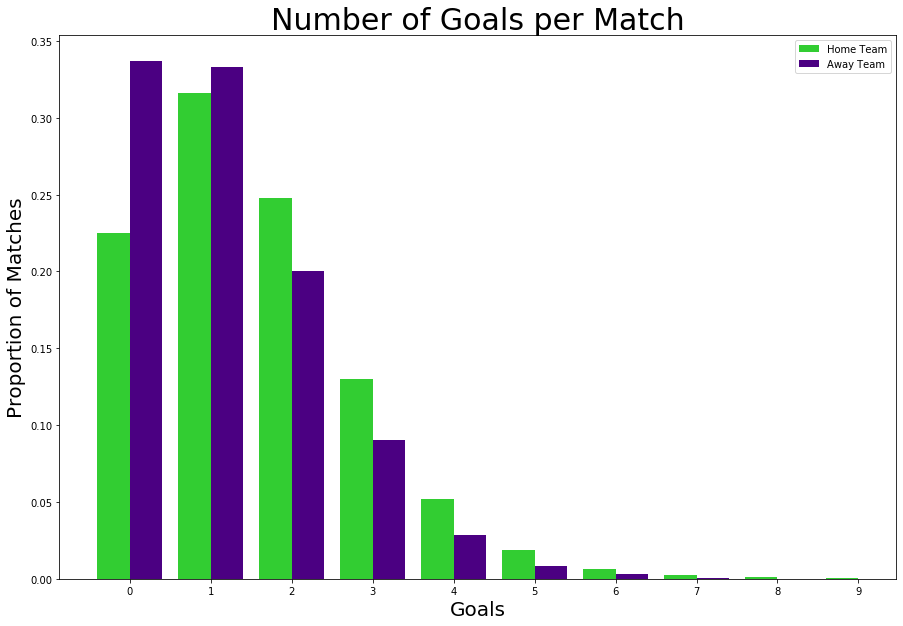

In [76]:
width = 0.4

fig, ax = plt.subplots(figsize = [15, 10])
Home = ax.bar(fthg_pro.index - width/2, fthg_pro.values, width, label = 'Home Team', color = 'limegreen')
Away = ax.bar(ftag_pro.index + width/2, ftag_pro.values, width, label = 'Away Team', color = 'indigo')
ax.set_ylabel('Proportion of Matches', fontsize = 20)
ax.set_xlabel('Goals', fontsize = 20)
ax.set_title('Number of Goals per Match', fontsize = 30)
ax.set_xticks(fthg_pro.index)
ax.legend()
plt.show()

Now that we have the actual goals scored per match, we can add the poisson distribution of the goals scored per
match to see if the plot follows this distribution.  If it does, we have visual evidence that we can use a Poisson
Regression to predict the match outcome probabilities.

In [20]:
# Instantiate the two final goals tally for the home and away team from pl_df.  This will be used in the for loop
gpm = pl_df[['FTHG', 'FTAG']] # GPM = Goals per Match

gpm

,FTHG,FTAG
0,0.0,2.0
1,0.0,2.0
2,0.0,1.0
3,2.0,1.0
4,1.0,6.0
...,...,...
3605,4.0,0.0
3606,3.0,1.0
3607,5.0,0.0
3608,1.0,2.0


In [21]:
gpm.mean() # sanity check

FTHG    1.568698
FTAG    1.179778
dtype: float64

In [22]:
# Calculate the poisson distribution using a for loop that will cycle through the means

fthg_values = []
ftag_values = []

for g in range(10):
        # Calculate the poisson distribution for the home team
        fthg_poisson = poisson.pmf(g, gpm.mean()[0])
        # Calculate the poisson distribution for the away team
        ftag_poisson = poisson.pmf(g, gpm.mean()[1])
        
        # Append the fthg values to a list
        fthg_values.append(fthg_poisson)
        
        # Append the ftag values to a list
        ftag_values.append(ftag_poisson)
        

In [23]:
# Sanity Check
print(fthg_values)

print(ftag_values)

[0.20831622090534652, 0.32678525179694656, 0.25631369541912863, 0.1340262656656071, 0.05256168576622803, 0.01649068290826313, 0.004311483716966485, 0.00096620230665537, 0.00018945996061597484, 3.3022830316043944e-05]
[0.30734684115816663, 0.3626011624633328, 0.213894508439243, 0.08411603983774109, 0.024809571583721546, 0.0058539593005579, 0.001151062449726504, 0.00019399980108370348, 2.860959670413753e-05, 3.750331559338933e-06]


In [24]:
# Now we have to concatenate them into an 2-D array

poisson_values = pd.DataFrame(np.column_stack([fthg_values, ftag_values]))

poisson_values = poisson_values.rename(columns = {0:'FTHG Poisson Vals', 1:'FTAG Poisson Vals'})

poisson_values

,FTHG Poisson Vals,FTAG Poisson Vals
0,0.208316,0.307347
1,0.326785,0.362601
2,0.256314,0.213895
3,0.134026,0.084116
4,0.052562,0.024810
5,0.016491,0.005854
6,0.004311,0.001151
7,0.000966,0.000194
8,0.000189,0.000029
9,0.000033,0.000004


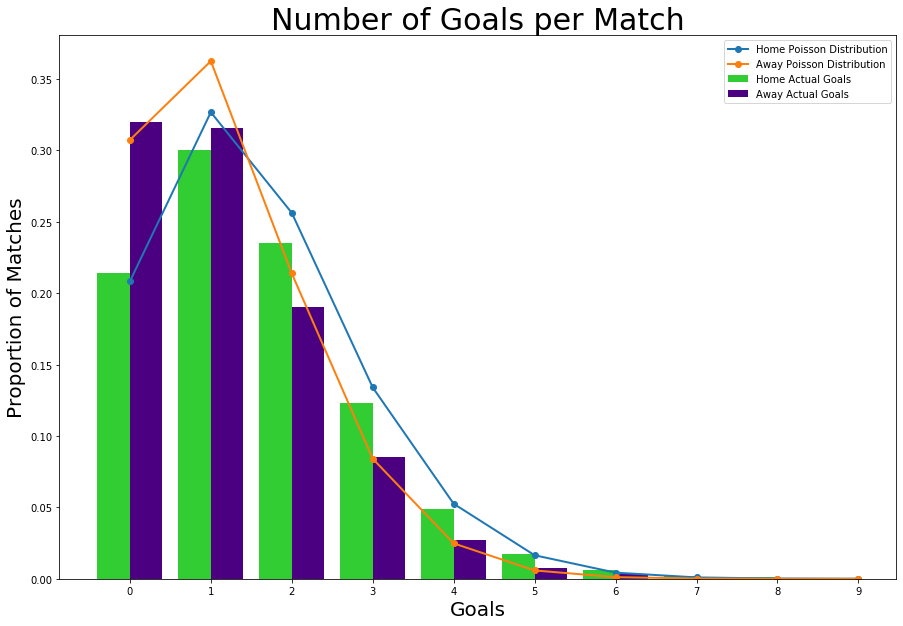

In [25]:
# We copy the same plot from above

# Add the following parameters
width = 0.4 # Determine width of the columns

fig, ax = plt.subplots(figsize = [15, 10])
# Plot the actual goals per proportion of matches
Home = ax.bar(fthg_pro.index - width/2, fthg_pro.values, width, label = 'Home Actual Goals', color = 'limegreen')
Away = ax.bar(ftag_pro.index + width/2, ftag_pro.values, width, label = 'Away Actual Goals', color = 'indigo')

# Plot the poisson values calculated above
FTHG_poisson_vals = ax.plot(poisson_values.index, poisson_values.iloc[:,0], marker = 'o', linewidth = 2,\
                            label = 'Home Poisson Distribution')
FTHG_poisson_vals = ax.plot(poisson_values.index, poisson_values.iloc[:,1], marker = 'o', linewidth = 2,\
                            label = 'Away Poisson Distribution')

ax.set_ylabel('Proportion of Matches', fontsize = 20)
ax.set_xlabel('Goals', fontsize = 20)
ax.set_title('Number of Goals per Match', fontsize = 30)
ax.set_xticks(fthg_pro.index)
ax.legend()
plt.show()

The plot generated above is consistent with the pattern seen in Poisson Distributions so we can move ahead with modelling using a Poisson Regression.  Football is typically a low scoring match and a higher number of goals scored per match is less likely to occur.  This is consistent with what is displayed in the plot and is further demonstrated when we ran the Poisson Distribution.

Further assumptions:
- Each goal scored is seen as an independent event from one another (i.e. a team scoring a goal does not lead to more goals being scored.  If that was the case, then we would see a right skewed distribution).
- We only know the average rate of goals scored and is independent of any occurrence.
- Goals from the home and away side cannot occur in the same instance.
- The Poisson Distribution is an **estimate** of the number of goals scored for both sides from 2009-2019.

We can provide further evidence to conduct a poisson regression by looking at the Skellam Distribution which is typical of poisson-distributed values.  The Skellam distribution is the difference between the two means for each goal scored in our dataset.  We will calculate the skellam probability mass function (pmf) as we did in the Poisson Distribution for each goal scored and their respective home and away means.  The Skellam distribution will show an convolution of the two poisson distributions calculated above into a binomial distribution.

In [26]:
skellam_vals = []

for g in range(-6, 9):
    skel_dist = skellam.pmf(g, gpm.mean()[0], gpm.mean()[1])
    
    skellam_vals.append(skel_dist)
    
skellam_vals_df = pd.DataFrame(skellam_vals, range(-6,9))

skellam_vals_df

,0
-6,0.000311
-5,0.001649
-4,0.007404
-3,0.027296
-2,0.079253
-1,0.170646
0,0.250022
1,0.226900
2,0.140118
3,0.064167


In [27]:
gd_pro = (pl_df['GoalDifference'].value_counts())/len(pl_df)

gd_pro = gd_pro.reset_index()

gd_pro = gd_pro.rename(columns = {'index':'GD', 'GoalDifference':'Proportion of Matches'})

gd_pro = gd_pro.sort_values(by = ['GD'])

gd_pro = gd_pro.set_index('GD', drop = True)

gd_pro

,Proportion of Matches
GD,
-6.0,0.001316
-5.0,0.004211
-4.0,0.013947
-3.0,0.037105
-2.0,0.075263
-1.0,0.158158
0.0,0.247368
1.0,0.211053
2.0,0.141579


In [28]:
# We can merge gd_pro into the skellam_values_df dataframe to make it easier to plot

plot_values = gd_pro.merge(skellam_vals_df, left_index = True, right_index = True)

plot_values = plot_values.rename(columns = {0:'Skellam'})

plot_values = plot_values.sort_values(by = ['GD'])

plot_values = plot_values.reset_index()

In [29]:
plot_values

,GD,Proportion of Matches,Skellam
0,-6.0,0.001316,0.000311
1,-5.0,0.004211,0.001649
2,-4.0,0.013947,0.007404
3,-3.0,0.037105,0.027296
4,-2.0,0.075263,0.079253
5,-1.0,0.158158,0.170646
6,0.0,0.247368,0.250022
7,1.0,0.211053,0.226900
8,2.0,0.141579,0.140118
9,3.0,0.064474,0.064167


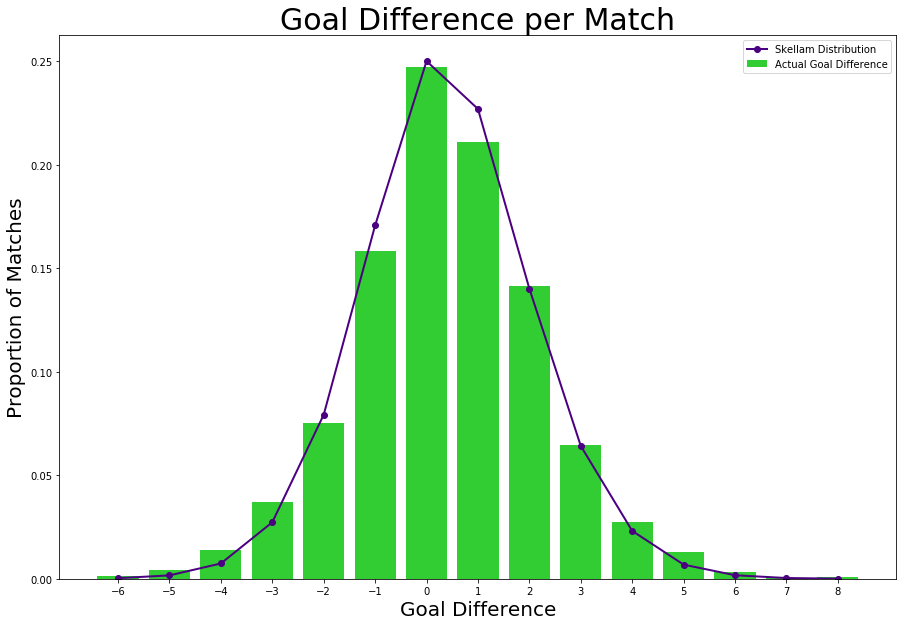

In [30]:
# Now that we have the values, we can plot the skellam distribution

fig, ax = plt.subplots(figsize = [15, 10])
# Since we are taking a difference in the means, we need the actual differences in goal scored.  We already have a
# column in pl_df that calculated the goal difference so we will again take the proportion.
actual = ax.bar(plot_values.iloc[:,0], plot_values.iloc[:,1], label = 'Actual Goal Difference', color = 'limegreen')

# Now we can add the skellam pmf values
skel = ax.plot(plot_values.iloc[:,0], plot_values.iloc[:,2], marker = 'o', color = 'indigo', linewidth = 2,\
                            label = 'Skellam Distribution')

ax.set_ylabel('Proportion of Matches', fontsize = 20)
ax.set_xlabel('Goal Difference', fontsize = 20)
ax.set_title('Goal Difference per Match', fontsize = 30)
ax.set_xticks(plot_values['GD'])
ax.legend()
plt.show()

As you can see from the plot above, we have a perfect case of a skellam distribution since the difference between the two means at every goal is a binomial distribution.  When we entered the skellam.pmf function values to this plot, the probabilities of each event (goal difference) occuring is very close to the actual values.  We can therefore use the poisson regression to model and predict outcomes.

# Modelling

In [31]:
# We will use statsmodels package to conduct a Poisson Regression Model
import statsmodels.api as sm
import statsmodels.formula.api as smf

Before we can begin modelling, we need to create a dataframe that will allow the model to digest the information.
These changes are standard when fitting the Poisson model.  The HomeTeam and AwayTeam features are categorical so we need to assign a numerical value to each so that the model will fit to the correct teams.

In [32]:
# Create a dataframe for the home team where we will then assign a 1
home_poisson = pl_train[['HomeTeam','AwayTeam','FTHG']]

# Create a new column that will assign a '1' to the HomeTeam
home_poisson = home_poisson.assign(home = 1)

# Rename the columns
home_poisson = home_poisson.rename(columns = {'HomeTeam':'team', 'AwayTeam':'opponent', 'FTHG':'goals'})

home_poisson

,team,opponent,goals,home
0,Aston Villa,Wigan,0.0,1
1,Blackburn,Manchester City,0.0,1
2,Bolton,Sunderland,0.0,1
3,Chelsea,Hull City,2.0,1
4,Everton,Arsenal,1.0,1
...,...,...,...,...
3605,Liverpool,Newcastle,4.0,1
3606,Manchester United,Huddersfield Town,3.0,1
3607,Tottenham Hotspur,AFC Bournemouth,5.0,1
3608,Watford,Chelsea,1.0,1


In [33]:
# Create a dataframe for the home team where we will then assign a 1
away_poisson = pl_train[['AwayTeam','HomeTeam','FTAG']]

# Create a new column that will assign a '1' to the HomeTeam
away_poisson = away_poisson.assign(home = 0)

# Rename the columns so that the AwayTeam is now the 'team' and the HomeTeam is now the 'opponent'
away_poisson = away_poisson.rename(columns = {'AwayTeam':'team', 'HomeTeam':'opponent', 'FTAG':'goals'})

away_poisson

,team,opponent,goals,home
0,Wigan,Aston Villa,2.0,0
1,Manchester City,Blackburn,2.0,0
2,Sunderland,Bolton,1.0,0
3,Hull City,Chelsea,1.0,0
4,Arsenal,Everton,6.0,0
...,...,...,...,...
3605,Newcastle,Liverpool,0.0,0
3606,Huddersfield Town,Manchester United,1.0,0
3607,AFC Bournemouth,Tottenham Hotspur,0.0,0
3608,Chelsea,Watford,2.0,0


In [34]:
# Concatenate the two dataframes together.
pl_poi = pd.concat([home_poisson, away_poisson])

pl_poi

,team,opponent,goals,home
0,Aston Villa,Wigan,0.0,1
1,Blackburn,Manchester City,0.0,1
2,Bolton,Sunderland,0.0,1
3,Chelsea,Hull City,2.0,1
4,Everton,Arsenal,1.0,1
...,...,...,...,...
3605,Newcastle,Liverpool,0.0,0
3606,Huddersfield Town,Manchester United,1.0,0
3607,AFC Bournemouth,Tottenham Hotspur,0.0,0
3608,Chelsea,Watford,2.0,0


How do we read our newly created dataframe?

- We see that we have double the number of rows than our initial dataset.  In order for our model to pull the information, it needs to know how the home team and away team are going to be.  It is for this reason that we created the new 'home' feature that will allow the model to know who the home team is and to pull the correct goals scored from the goals feature.  If the team is the home team, denoted by '1', then it will take the goals from the column next to it and if it's the away team, it will take the goals where home is denoted a '0'. For example, we see that Aston Villa is the home team so the model will associated 0 goals to then whereas the away team is denoted as the '0' and will assocaited 2 goals to them.
- Essentially we have 3800 rows where the home team is the 'team' and another 3800 rows where the away team is the 'team'.

In [35]:
# Now we can model the dataframe

# Write the formula that we will be entering into the model
formula = 'goals ~ home + team + opponent'

# Instantiate the model
pl_pm = smf.glm(formula = formula, data = pl_poi, family = sm.families.Poisson())

# Fit the model
pl_pm = pl_pm.fit()

# Get a summary of the model
pl_pm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 7220
Model:                            GLM   Df Residuals:                     7148
Model Family:                 Poisson   Df Model:                           71
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10420.
Date:                Sun, 22 Mar 2020   Deviance:                       8081.8
Time:                        20:52:36   Pearson chi2:                 7.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.3526      0.102      3.440      0.001       0.152       0.553
team[T.Arsenal]                          0.3549      0.085      4.153      0.000       0.187       0.522
team[T.Aston Villa]                     -0.2410      0.097     -2.478      0.013      -0.432      -0.050
team[T.Birmingham]                      -0.3419      0.139     -2.457      0.014      -0.615      -0.069
team[T.Blackburn]                       -0.1457      0.116     -1.259      0.208      -0.373       0.081
team[T.Blackpool]                        0.0663      0.156      0.426      0.670      -0.239       0.371
team[T.Bolton]                          -0.1066      0.115     -0.930      0.352      -0.331       0.118
team[T.Brighton and Hove Albion]        -0.3041      0.155     -1.961      0.050      -0.608      -0.000
team[T.Burnley]                         -0.3291      0.110     -3.002      0.003      -0.544      -0.114
team[T.Cardiff City]                    -0.4044      0.161     -2.515      0.012      -0.720      -0.089
team[T.Chelsea]                          0.3522      0.085      4.123      0.000       0.185       0.520
team[T.Crystal Palace]                  -0.1726      0.101     -1.711      0.087      -0.370       0.025
team[T.Everton]                          0.0672      0.088      0.761      0.446      -0.106       0.240
team[T.Fulham]                          -0.1561      0.100     -1.558      0.119      -0.352       0.040
team[T.Huddersfield Town]               -0.6238      0.176     -3.551      0.000      -0.968      -0.279
team[T.Hull City]                       -0.3443      0.114     -3.031      0.002      -0.567      -0.122
team[T.Leicester City]                   0.0786      0.100      0.787      0.431      -0.117       0.274
team[T.Liverpool]                        0.2987      0.086      3.476      0.001       0.130       0.467
team[T.Manchester City]                  0.4669      0.084      5.525      0.000       0.301       0.633
team[T.Manchester United]                0.3140      0.086      3.662      0.000       0.146       0.482
team[T.Middlesbrough]                   -0.6059      0.207     -2.925      0.003      -1.012      -0.200
team[T.Newcastle]                       -0.1208      0.094     -1.285      0.199      -0.305       0.063
team[T.Norwich City]                    -0.2350      0.110     -2.132      0.033      -0.451      -0.019
team[T.Portsmouth]                      -0.4257      0.188     -2.261      0.024      -0.795      -0.057
team[T.QPR]                             -0.2777      0.121     -2.298      0.022      -0.515      -0.041
team[T.Reading]                         -0.1621      0.171     -0.948      0.343      -0.497       0.173
team[T.Southampton]                   

Great! We have our model that we will be able to pass into a function (below) but what do these numbers represent?  We should be mostly concerned with the coefficients for now.

- The coefficients with 'team' is the offensive strength for that team.
- Positive values suggest that we expect the team to score more goals.
- Values closer to 0 suggest that we expect observations to be closer a draw.
- Negative values suggest that we expect the team to score less goals.
- The 'home' coefficient represents home field advantage which is a real feature in itself.  It is well known that teams playing at home have a higher likelihood of scoring goals and thus winning games.  In this case, the coefficient is 0.2859 which means that the team is 1.32 times more likely to score a goal (e is the mathematical constant from the poisson distribution function - e^0.2859).
- If we take an example of two teams, Liverpool and Everton, we see that the offensive strength is 0.2969 and 0.0424 respectively.  Consequently, Liverpool is more likely to score on average than Everton.
- The coefficients with 'opponent' is the defensive strength for a team.  Smaller and negative values suggests that it is more difficult to score against a team.
- If we take the same two teams, Liverpool and Everton, we see that the defensive strength is -0.4468 and -0.3396 respectively.  Consequently, it is more difficult to score against Liverpool than Everton.

**Theses are not probabilities.  We will calculate the probabilities below.**

Now that we have our model, we can begin predicting outcomes for games.  We will have to create a function where we can pass the model, the home team, the away team and the maximum number of goals.  We expect to see the probability of each goal scored to decrease as the number of goals increases.

In [90]:
def simulation(pl_pm, HomeTeam, AwayTeam, max_goals):
    # We use the .predict method to predict the average number of goals scored by each team.
    # We take the data from the dataframe that we created and rename the columns.  The identifier for the home team
    # will be a 1 or a 0 so that the simulation function knows which to assign the home advantage coefficient.
    avg_goals_home = pl_pm.predict(pd.DataFrame(data = {'team':HomeTeam, 'opponent':AwayTeam, 'home':1},\
                                               index = [1])).values[0]
    avg_goals_away = pl_pm.predict(pd.DataFrame(data = {'team':AwayTeam, 'opponent':HomeTeam, 'home':0},\
                                               index = [1])).values[0]
    
    # We use the poisson.pmf from the poisson distribution which will calculate the the probabilities for each goal in
    # the range specified.  This will in turn run through a for loop of the simulation and the probabilities of each
    # scoreline
    predictions = [[poisson.pmf(g, avg_goals) for g in range(0, max_goals+1)] 
                   for avg_goals in [avg_goals_home, avg_goals_away]]
    
    # We take all of those probabilities and return a matrix where the columns represent the home team goal probs and
    # the rows are the away team goal probs
    return(pd.DataFrame(np.outer(np.array(predictions[1]), np.array(predictions[0]))))

In [99]:
# If we run our two teams into the function, we get a Dataframe of the probabilities for each team scoring 
# max_goals = n.  In this case we put a maximum of 6 goals as anything more is highly unlikely.

simulation(pl_pm, 'Liverpool', 'Everton', max_goals = 8)

,0,1,2,3,4,5,6,7,8
0,0.056149,0.105325,0.098786,0.061768,2.896658e-02,1.086724e-02,3.397502e-03,9.104446e-04,2.134791e-04
1,0.056369,0.105739,0.099174,0.062011,2.908030e-02,1.090990e-02,3.410840e-03,9.140188e-04,2.143172e-04
2,0.028295,0.053077,0.049781,0.031127,1.459723e-02,5.476364e-03,1.712115e-03,4.588035e-04,1.075793e-04
3,0.009469,0.017762,0.016659,0.010416,4.884845e-03,1.832621e-03,5.729454e-04,1.535349e-04,3.600054e-05
4,0.002376,0.004458,0.004181,0.002614,1.226005e-03,4.599538e-04,1.437987e-04,3.853441e-05,9.035466e-06
5,0.000477,0.000895,0.000840,0.000525,2.461637e-04,9.235190e-05,2.887264e-05,7.737137e-06,1.814187e-06
6,0.000080,0.000150,0.000140,0.000088,4.118834e-05,1.545241e-05,4.830997e-06,1.294585e-06,3.035516e-07
7,0.000011,0.000021,0.000020,0.000013,5.907148e-06,2.216153e-06,6.928518e-07,1.856668e-07,4.353475e-08
8,0.000001,0.000003,0.000003,0.000002,7.412923e-07,2.781066e-07,8.694647e-08,2.329946e-08,5.463207e-09


As you can see, this matrix shows the probabilities of each goal and score occuring between Liverpool and Everton.  The home team goals are represented in the columns while the away team goals are represented in the rows.  When the score is a draw (same goals for both home and away), the probabilities are found in the diagonal of the dataframe.

To get the probabilities of a win for the home team, a draw, and a win for the away team, we must add all of probabilities together.  We can write a function that will allow us to see the match probability outcomes.

In [97]:
# The function returns the sum of the probabilties in the matrix above.
def match_outcome(HomeTeam, AwayTeam):
    
    # For home win, takes the sum of the upper triangle of the array
    home_win = np.sum(np.triu(simulation(pl_pm, HomeTeam, AwayTeam, max_goals = 8), 1))
    
    # For a draw, takes the sum of the diagonal values in the array
    draw = np.sum(np.diag(simulation(pl_pm, HomeTeam, AwayTeam, max_goals = 8)))
    
    # For away win, takes the sum of the lower triangle of the array
    away_win = np.sum(np.tril(simulation(pl_pm, HomeTeam, AwayTeam, max_goals = 8), -1))
    
    return(home_win, draw, away_win)

In [98]:
match_outcome('Liverpool', 'Everton')


(0.5775989629627949, 0.22340898370113724, 0.19884209879030001)

Now that we have a function to calculate the probabilities for a home win, a draw, and an away win, we can pass the same teams (Liverpool and Everton) into the function.  As you can see below, the probabilities of a Liverpool win at home is 58.3%, the probabilities of a draw is 22.2% and the probabilities of Everton winning away is 19.4%.  But how do we know if these are accurate?  We can compare the predicted goals with the actual goals scored for each match in the test set and calculate the proportion of predictions which would give us the accuracy of the model.

The good news is that we have a function that will allow the user to input two teams to get match outcome probabilities.  The great news is that we also have the simulation function that predicts the predicted goals before it converts them to probabilities and outputs the matrix above.  We can use these predicted goals and compare them to the actual goals to see if there is a match between the two.

# Model Evaluation - Actual Goals vs Predicted Goals

If you recall, the poisson regression allows us to predict the number of goals to be scored by two teams when we enter them into the simulation function:

In [100]:
# To predict the number of goals for the home team, we need to pass the two teams into the .predict function.
# This function only allows me to pass through a dataframe
# When home is set to 1, the team inputted in 'team' is regarded as the home team.
pl_pm.predict(pd.DataFrame(data = {'team':'Liverpool', 'opponent':'Everton', 'home':1}, index = [1]))

1    1.875823
dtype: float64

In [101]:
# When home is set to 0, the team inputted in 'team' is regarded as the away team.
pl_pm.predict(pd.DataFrame(data = {'team':'Everton', 'opponent':'Liverpool', 'home':0}, index = [1]))

1    1.003926
dtype: float64

Based on these results, Liverpool is predicted to score 1.88 goals against Everton at home while Everton is predicted to score 1.00 goals away.

In [107]:
pl_df[(pl_df['HomeTeam'] == 'Liverpool') & (pl_df['AwayTeam'] == 'Everton')].tail(1)

,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,GoalDifference,HS,AS,HST,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,FTR
3559,2018-02-12,2018-2019,Liverpool,Everton,1.0,0.0,1.0,16.0,9.0,3.0,...,8.0,1.0,3.0,2.0,0.0,0.0,1.4,5.0,9.0,H


When we pull the Liverpool-Everton match from the test set, we see that the actual scoreline was 1-0 for the home team.  Our model predicted that Liverpool would win 2-1 (rounded).  However, the goal difference is still 1 goal and the result is still a win for Liverpool.  It looks like our model is doing just fine but this is only a prediction for 1 match.  We can try to predict all the other matches in the test set and see what our accuracy is like.  Since the predictions are floats, we need to convert them to integers since goals are whole numbers only.

In [43]:
# Looking at the dataframe, the index is still pulling from when we initially sliced into our train and test set.
pl_test.head(5)

,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,GoalDifference,HS,AS,HST,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,FTR
3610,2018-12-29,2018-2019,Brighton and Hove Albion,Everton,1.0,0.0,1.0,11.0,13.0,3.0,...,6.0,6.0,0.0,2.0,0.0,0.0,3.25,3.4,2.14,H
3611,2018-12-29,2018-2019,Fulham,Huddersfield Town,1.0,0.0,1.0,14.0,9.0,5.0,...,4.0,3.0,3.0,1.0,0.0,0.0,2.00,3.4,3.75,H
3612,2018-12-29,2018-2019,Leicester City,Cardiff City,0.0,1.0,-1.0,16.0,12.0,7.0,...,10.0,4.0,0.0,2.0,0.0,0.0,1.55,4.0,6.00,A
3613,2018-12-29,2018-2019,Liverpool,Arsenal,5.0,1.0,4.0,15.0,8.0,10.0,...,5.0,3.0,1.0,2.0,0.0,0.0,1.50,4.5,5.75,H
3614,2018-12-29,2018-2019,Tottenham Hotspur,Wolverhampton,1.0,3.0,-2.0,10.0,11.0,3.0,...,6.0,7.0,3.0,2.0,0.0,0.0,1.33,5.0,8.50,A


In [44]:
# Reset the index
pl_test = pl_test.reset_index(drop = True)

In [45]:
pl_test.head(5)

,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,GoalDifference,HS,AS,HST,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,FTR
0,2018-12-29,2018-2019,Brighton and Hove Albion,Everton,1.0,0.0,1.0,11.0,13.0,3.0,...,6.0,6.0,0.0,2.0,0.0,0.0,3.25,3.4,2.14,H
1,2018-12-29,2018-2019,Fulham,Huddersfield Town,1.0,0.0,1.0,14.0,9.0,5.0,...,4.0,3.0,3.0,1.0,0.0,0.0,2.00,3.4,3.75,H
2,2018-12-29,2018-2019,Leicester City,Cardiff City,0.0,1.0,-1.0,16.0,12.0,7.0,...,10.0,4.0,0.0,2.0,0.0,0.0,1.55,4.0,6.00,A
3,2018-12-29,2018-2019,Liverpool,Arsenal,5.0,1.0,4.0,15.0,8.0,10.0,...,5.0,3.0,1.0,2.0,0.0,0.0,1.50,4.5,5.75,H
4,2018-12-29,2018-2019,Tottenham Hotspur,Wolverhampton,1.0,3.0,-2.0,10.0,11.0,3.0,...,6.0,7.0,3.0,2.0,0.0,0.0,1.33,5.0,8.50,A


We first need to create a for loop that will allow us to:

- Simulate the matches
- Pull the home and away teams and append them each to empty lists
- Pull the predicted home and away goals and append them each to empty lists
- Pull the actual home and away goals and append them each to empty lists


In [87]:
# Reminder of the simulation function that we created earlier.  However, it is much easier to get the indices of the
# max value if we use an array.  We will just rename the function to 'simulate'
def simulate(pl_pm, HomeTeam, AwayTeam, max_goals):
    # We use the .predict method to predict the average number of goals scored by each team.
    # We take the data from the dataframe that we created and rename the columns.  The identifier for the home team
    # will be a 1 or a 0 so that the simulation function knows which to assign the home advantage coefficient.
    avg_goals_home = pl_pm.predict(pd.DataFrame(data = {'team':HomeTeam, 'opponent':AwayTeam, 'home':1},\
                                               index = [1])).values[0]
    avg_goals_away = pl_pm.predict(pd.DataFrame(data = {'team':AwayTeam, 'opponent':HomeTeam, 'home':0},\
                                               index = [1])).values[0]
    
    predictions = [[poisson.pmf(g, avg_goals) for g in range(0, max_goals+1)] 
                   for avg_goals in [avg_goals_home, avg_goals_away]]
    
    return(np.outer(np.array(predictions[1]), np.array(predictions[0])))

In [47]:
# Create empty lists that will hold all of their respective values
HomeTeam = []
AwayTeam = []
HomePredGoals = []
AwayPredGoals = []
HomeActGoals = []
AwayActGoals = []

In [85]:
# Create a for loop that will run the simulation and append the correct values into their respective lists

for i in range(0, len(pl_test)):
    # enter the home team and away team
    preds = simulate(pl_pm, pl_test['HomeTeam'][i], pl_test['AwayTeam'][i], max_goals = 9)
    # Remember that the predictions in the simulate function will now return an array of the probabilities
    # so in order to get the best score line, we will pass the argument:
        # argmax will return the index of the highest value according to the shape of the dataframe (all are 10x10)
        # because the max_goals is set to 9 (ie. 0-9). 
    max_indices = np.unravel_index(preds.argmax(), preds.shape)
    
    # Append the home and away team names of the test set into the empty lists
    HomeTeam.append(pl_test['HomeTeam'][i])
    AwayTeam.append(pl_test['AwayTeam'][i])
    
    # Append the predicted home and away goals for both teams of the test set
    HomePredGoals.append(max_indices[1])
    AwayPredGoals.append(max_indices[0])
    
    # Append the actual home and way goals for both teams of the test set
    HomeActGoals.append(pl_test['FTHG'][i])
    AwayActGoals.append(pl_test['FTAG'][i])

# And we can now consolidate these lists into a dataframe

goals_df = pd.DataFrame({'Home Team': HomeTeam, 'Away Team': AwayTeam, 'Home Predicted Goals':HomePredGoals,\
                         'Away Predicted Goals': AwayPredGoals, 'Home Actual Goals':HomeActGoals,\
                         'Away Actual Goals':AwayActGoals})

In [86]:
goals_df

,Home Team,Away Team,Home Predicted Goals,Away Predicted Goals,Home Actual Goals,Away Actual Goals
0,Brighton and Hove Albion,Everton,1,1,1.0,0.0
1,Fulham,Huddersfield Town,1,0,1.0,0.0
2,Leicester City,Cardiff City,2,0,0.0,1.0
3,Liverpool,Arsenal,1,1,5.0,1.0
4,Tottenham Hotspur,Wolverhampton,2,0,1.0,3.0
...,...,...,...,...,...,...
755,Liverpool,Wolverhampton,2,0,2.0,0.0
756,Manchester United,Cardiff City,2,0,0.0,2.0
757,Southampton,Huddersfield Town,1,0,1.0,1.0
758,Tottenham Hotspur,Everton,1,0,2.0,2.0


In [50]:
goals_df.to_csv(r'goals_df.csv')

Now that we have our dataframe containing the goals, we need to check whether or not the predicted goals had an equivalent score to the actual goals.  We aren't as interested in the actual scoreline because we are trying to see whether the result is correct (home win, draw or away win)

In [51]:
def transformer(dataframe):
    # Get the results of the actual game and assign the result: H = Home Win, D = Draw, A = Away Win
    dataframe.loc[(dataframe['Home Actual Goals'] > dataframe['Away Actual Goals']), 'Result'] = 'H'
    dataframe.loc[(dataframe['Home Actual Goals'] == dataframe['Away Actual Goals']), 'Result'] = 'D'
    dataframe.loc[(dataframe['Home Actual Goals'] < dataframe['Away Actual Goals']), 'Result'] = 'A'
    
    # Get the results of the predicted simulation and assign a result: H = Home Win, D = Draw, A = Away Win
    dataframe.loc[(dataframe['Home Predicted Goals'] > dataframe['Away Predicted Goals']), 'PredictedResult'] = 'H'
    dataframe.loc[(dataframe['Home Predicted Goals'] == dataframe['Away Predicted Goals']), 'PredictedResult'] = 'D'
    dataframe.loc[(dataframe['Home Predicted Goals'] < dataframe['Away Predicted Goals']), 'PredictedResult'] = 'A'
    
    # Now we have to account if there is a PERFECT result.  That is to say the actual goals scored by the home and
    # away team is the exact same as the predicted goals scored by both teams.
    dataframe['Perfect Match'] = 'No'
    dataframe.loc[(dataframe['Home Actual Goals'] == dataframe['Home Predicted Goals']) &\
                  (dataframe['Away Actual Goals'] == dataframe['Away Predicted Goals']), 'Perfect Match'] = 'Yes'
    
    # Finally we can pass through if the the result from the actual game and the predicted simulation are equal.
    # This will give us a match to see how well we predicted the outcome
    dataframe.loc[dataframe['Result'] == dataframe['PredictedResult'], 'Correctly Predicted'] = 'Yes'
    dataframe.loc[dataframe['Result'] != dataframe['PredictedResult'], 'Correctly Predicted'] = 'No'
    
    return dataframe

In [52]:
# Now we just input the goals_df dataframe into the transformer function which will spit out our evaluation table
transformer(goals_df)

,Home Team,Away Team,Home Predicted Goals,Away Predicted Goals,Home Actual Goals,Away Actual Goals,Result,PredictedResult,Perfect Match,Correctly Predicted
0,Brighton and Hove Albion,Everton,1,1,1.0,0.0,H,D,No,No
1,Fulham,Huddersfield Town,1,0,1.0,0.0,H,H,Yes,Yes
2,Leicester City,Cardiff City,2,0,0.0,1.0,A,H,No,No
3,Liverpool,Arsenal,1,1,5.0,1.0,H,D,No,No
4,Tottenham Hotspur,Wolverhampton,2,0,1.0,3.0,A,H,No,No
...,...,...,...,...,...,...,...,...,...,...
185,Liverpool,Wolverhampton,2,0,2.0,0.0,H,H,Yes,Yes
186,Manchester United,Cardiff City,2,0,0.0,2.0,A,H,No,No
187,Southampton,Huddersfield Town,1,0,1.0,1.0,D,H,No,No
188,Tottenham Hotspur,Everton,1,0,2.0,2.0,D,H,No,No


In [53]:
# All that is left to do is to do a count of the the values and divide by the entire dataframe.  We see that our model
# did horribly in predicting the actual score of the game.

perfectmatches = goals_df['Perfect Match'].value_counts()
perfectmatches

No     166
Yes     24
Name: Perfect Match, dtype: int64

In [54]:
# Let's check the ratio of the how well our model predicted the scores
perfectmatchesratio = (goals_df['Perfect Match'].value_counts())/len(goals_df)
perfectmatchesratio

No     0.873684
Yes    0.126316
Name: Perfect Match, dtype: float64

In [55]:
# Now let's check the most important metric: did our model correctly predict the outcome of the matches
correctlypredicted = goals_df['Correctly Predicted'].value_counts()
correctlypredicted

No     97
Yes    93
Name: Correctly Predicted, dtype: int64

In [56]:
# We can take the proportion of 'yes' to serve as the accuracy score
correctlypredicted = goals_df['Correctly Predicted'].value_counts()/len(goals_df)
correctlypredicted

No     0.510526
Yes    0.489474
Name: Correctly Predicted, dtype: float64

In [60]:
# Check to see how the results for the test set were predicted
predicted = goals_df['PredictedResult'].value_counts()

predicted

D    87
H    76
A    27
Name: PredictedResult, dtype: int64

In [61]:
# Check to see the actual results from the test set
actual = goals_df['Result'].value_counts()

actual

H    95
A    62
D    33
Name: Result, dtype: int64

The prediction accuracy of the model is 49% which is just shy of the goal that was set at the beginning of the process.  It is important to note that professional models have an accuracy rate of 60-65% and such a result is achievable granted the time, resources and data that is only available to bookmakers.  Overall I am quite happy with the result although improvements can be made.  So why is the result so low?  Predicting sports outcomes is no feat since there is a multitude of features that remain unaccounted for or are unquantifiable.  For example, how do we measure the quality of the pitch on game day or the starting XI for that week's match?  What about player fitness, form, injuries?  Based on historical results, when a new manager comes into a team, they play better but how to we measure their impact?  How about the fact that certain teams play more games and their match schedules might lead to fatigue?  As you can see there are too many factors that may lead to a result and most of this data is either unavailable to the public or impossible to assign a value to.  The point is that the prediction accuracy will never be high and if it were, we would all be making near guaranteed money on sports.

In addition to these factors, we cannot blindly decide to use more data since each season is different wherein the past does not necessarily dictate success.  Outside of the top 6 teams (Liverpool, Manchester United, Manchester City, Chelsea, Arsenal, Tottenham) that have copious amounts of money to spend on transfers, the bottom 3 teams get relegated to the lower tier while the top 3 teams from the lower tier enter the Premier League.  For example, Leeds United is set to enter the top tier since 2003.  It is quite obvious that the 2003 team will be nothing like the 2020 team so how can we train our data on what is basically a completely different team?  The teams that go through relegation/promotion pose difficulty when it comes to selecting the right amount of data and features that our model cannot process.  Results will naturally end up being completely inaccurate.  If we too little data, then our model does not have enough to train on to predict accurately.  Such is the dilemma when it comes to european soccer.

Simply adding more features does not improve the model as well (see **Poisson Model - SPI Data Only**).  I conducted the model by adding SPI, expected goals and match importance to the model and it returned worst results at a measly 46%.  Granted that these features were only available from 2016-2020 but we still expected to generate better accuracy since the there aren't many changes to team composition over such a period (most players, especially the world-class players sign contracts no longer than 5 years).  This model is not a finished product and we can add features but most of this work requires more time and research to complete.  I have a solid model to begin with so I plan to optimize and reiterate until it reaches accuracy closer to 60%.  Another suggestion through my research is to use a bivariate poisson model but there is limited resources available.  The documentation for the poisson model is also limited and is not fully explained nor are there many methods or updates since it is rarely used.

Once I have better model results, I plan to launch an API that will direct the user to a website and allow them to input two teams to get the match result probabilities in a cleaner interface.

# Try it for yourself!

Get the matrix for goal probabilities:

In [ ]:

simulation(pl_pm, HomeTeam, AwayTeam, max_goals)

Get the final tabulated match outcome probabilities:

In [ ]:
match_outcome('Liverpool', 'Everton')
